# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\peter\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


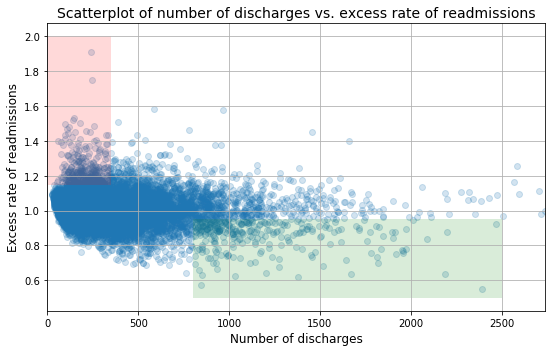

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

**A. Do you agree with the above analysis and recommendations? Why or why not?**

I do not agree, there was no real statistical analysis done to reach their conclusions.

**B. Provide support for your arguments and your own recommendations with a statistically sound analysis:**
    
    1) Conduct a hypothesis test, I will use a T-test to see whether there are differences in readmission 
    for smaller hospitals with discharges <=100 and larger hospital with discharges >1000.
    
    Null Hypothesis: There is no difference between the smaller and larger hospitals
    Alternative Hypothesis: There is a significant difference

In [19]:
# Hypothesis test 
# Splitting the hospitals into two groups
# Small hospitals
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
small_hos = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].astype(int) <= 100]
small_hos = small_hos[small_hos['Number of Discharges'].astype(int) != 0]
small_hos.sort_values(by = 'Number of Discharges', ascending = False).head(3)


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
10034,HURON MEDICAL CENTER,230118,MI,READM-30-HF-HRRP,99,NaN,0.9538,21.0,22.0,18.0,07/01/2010,06/30/2013
11659,MERCY HEALTH HACKLEY CAMPUS,230066,MI,READM-30-COPD-HRRP,99,NaN,0.9218,19.2,20.9,13.0,07/01/2010,06/30/2013
8739,NORTH METRO MEDICAL CENTER,40074,AR,READM-30-COPD-HRRP,99,NaN,0.9724,19.2,19.8,17.0,07/01/2010,06/30/2013


In [20]:
small_hos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 8 to 12543
Data columns (total 12 columns):
Hospital Name                 1223 non-null object
Provider Number               1223 non-null int64
State                         1223 non-null object
Measure Name                  1223 non-null object
Number of Discharges          1223 non-null object
Footnote                      0 non-null float64
Excess Readmission Ratio      1223 non-null float64
Predicted Readmission Rate    1223 non-null float64
Expected Readmission Rate     1223 non-null float64
Number of Readmissions        1223 non-null float64
Start Date                    1223 non-null object
End Date                      1223 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 124.2+ KB
None


In [10]:
# Large hospitals
big_hos = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].astype(int) >= 1000]
big_hos = big_hos[big_hos['Number of Discharges'].astype(int) != 0]
big_hos.sort_values(by = 'Number of Discharges', ascending = False).head(3)


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013


In [21]:
big_hos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 14 to 13730
Data columns (total 12 columns):
Hospital Name                 464 non-null object
Provider Number               464 non-null int64
State                         464 non-null object
Measure Name                  464 non-null object
Number of Discharges          464 non-null object
Footnote                      0 non-null float64
Excess Readmission Ratio      464 non-null float64
Predicted Readmission Rate    464 non-null float64
Expected Readmission Rate     464 non-null float64
Number of Readmissions        464 non-null float64
Start Date                    464 non-null object
End Date                      464 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 47.1+ KB


In [16]:
import scipy.stats as st
group_small = small_hos['Excess Readmission Ratio']
group_big = big_hos['Excess Readmission Ratio']
results = st.ttest_ind(group_small,group_big, equal_var=False)
print("Test statistic is equal to : %6.4F  p-value equal to: %6.15F" % (results[0],results[1]))


Test statistic is equal to : 7.5330  p-value equal to: 0.000000000000206


**Report statistical significance for α = .01**

As p < 0.01, we can reject the null hypothesis that there are no significant differences between the two hospital groups.

**Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

The hypothesis test shows that there is a significant difference between the two groups but the difference between the two groups may not be meaningful in a practical sense. The samples we used are quite large and large sample sizes can make hypothesis testing very sensitive to slight differences in the data which may be inconsequential in reality. 

**Look at the scatterplot above.**

What are the advantages and disadvantages of using this plot to convey information?
- Relationsips are clear and high density of information

Construct another plot that conveys the same information in a more direct manner.
- Added in a correlation line to show there's a slight negative correlation

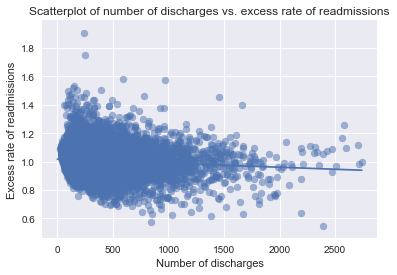

In [23]:
import seaborn as sns

sns.set()
plt.scatter(x, y, alpha=0.5)

slope, intercept = np.polyfit(x, y, 1)

x = np.array([0, max(x)])
y = slope * x + intercept

plt.plot(x, y)

plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of readmissions')
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions')

plt.show()
